# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
#%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [35]:
path = '../../../../pandas_exercises_with_data/data/'
chipo = pd.read_csv(path+'chipotle.tsv', sep = '\t')

### Step 4. See the first 10 entries

In [36]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [37]:
chipo_top5=(chipo.groupby('item_name').sum()). sort_values(by= 'quantity',ascending = False).iloc[0:5,1]
chipo_top5  #top5 item 的quantity

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

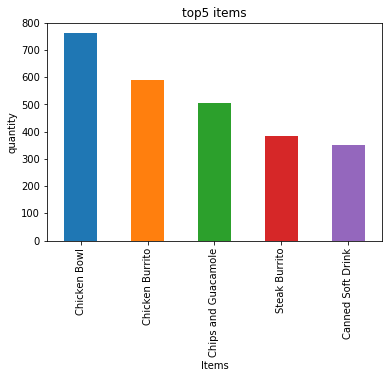

In [38]:
chipo_top5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('quantity')
plt.title('top5 items')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0.5,1,'the number of items orderered per order price')

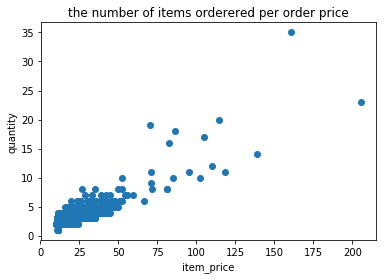

In [39]:
trans = lambda x:float(x[1:-1])
chipo.item_price = chipo.item_price.apply(trans) #变为float
orders = chipo.groupby('order_id').sum()
plt.scatter(x=orders.item_price,y=orders.quantity)
plt.xlabel('item_price')
plt.ylabel('quantity')
plt.title('the number of items orderered per order price')

### Step 7. BONUS: Create a question and a graph to answer your own question.

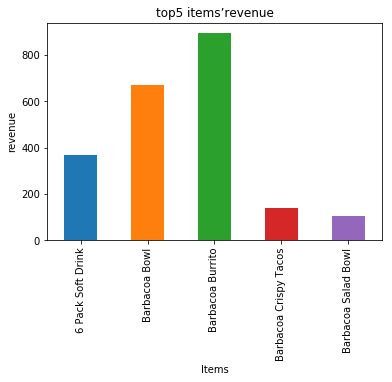

In [40]:
#计算top5item 收入
chipo['revenue']=chipo.quantity*chipo.item_price #每笔收入
Items_rev=(chipo.groupby('item_name').sum()).loc[:,'revenue']#每个item收入
top5_rev = Items_rev[0:5]
top5_rev.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('revenue')
plt.title('top5 items’revenue')
plt.show()
